- Importing the necesssary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [21]:
# Loading the dataset
df = pd.read_csv("Assignment2-Dataset.csv")
df

,Unnamed: 0,Hour,Heart_Rate_bpm,SpO2_Percent,MAP_mmHg,Pain_Scale,IV_Fluid_ml
0,2023-01-01 00:00:00,0,75.000000,97.308600,90.000000,4,500
1,2023-01-01 01:00:00,1,76.490142,98.463089,91.145166,5,0
2,2023-01-01 02:00:00,2,75.628307,98.954708,93.371294,5,0
3,2023-01-01 03:00:00,3,77.382880,97.300716,93.534914,5,0
4,2023-01-01 04:00:00,4,81.237106,98.281485,91.886718,4,0
...,...,...,...,...,...,...,...
495,2023-01-21 15:00:00,495,79.784208,97.499190,92.190547,4,0
496,2023-01-21 16:00:00,496,79.965676,97.859450,94.179493,4,0
497,2023-01-21 17:00:00,497,75.364235,98.898843,96.101932,4,0
498,2023-01-21 18:00:00,498,74.683948,98.320421,97.173973,5,0


In [22]:
# Renaming the Unnamed Column to Time
df.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)

# Converting to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Setting it as the index
df.set_index('Time', inplace=True)
df.head()

,Hour,Heart_Rate_bpm,SpO2_Percent,MAP_mmHg,Pain_Scale,IV_Fluid_ml
Time,,,,,,
2023-01-01 00:00:00,0,75.000000,97.308600,90.000000,4,500
2023-01-01 01:00:00,1,76.490142,98.463089,91.145166,5,0
2023-01-01 02:00:00,2,75.628307,98.954708,93.371294,5,0
2023-01-01 03:00:00,3,77.382880,97.300716,93.534914,5,0
2023-01-01 04:00:00,4,81.237106,98.281485,91.886718,4,0


- Multivariate Analysis

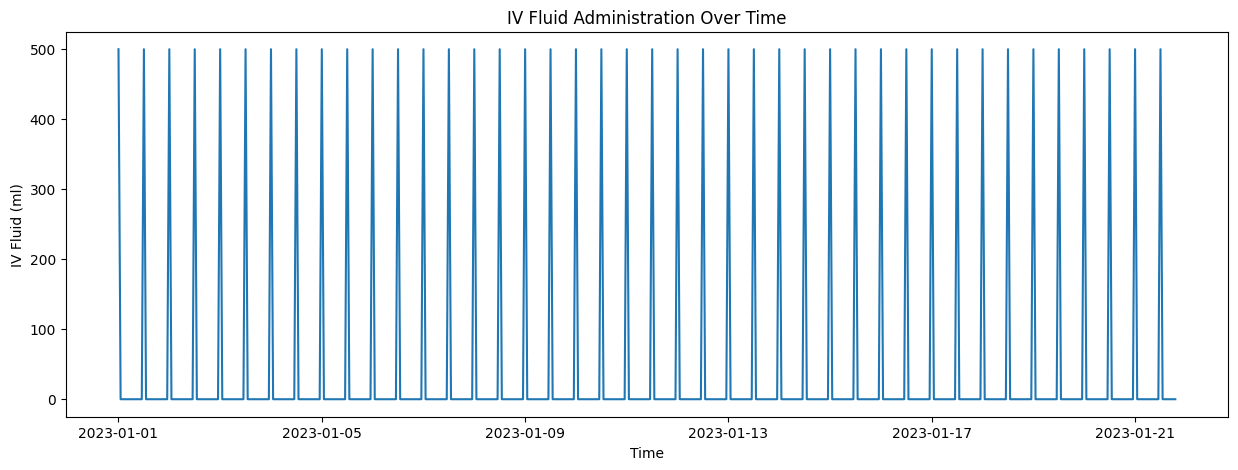

In [29]:
# IV Fluid over time plot
plt.figure(figsize=(15,5))
plt.plot(df.index, df['IV_Fluid_ml'])
plt.title("IV Fluid Administration Over Time")
plt.xlabel("Time")
plt.ylabel("IV Fluid (ml)")
plt.show()

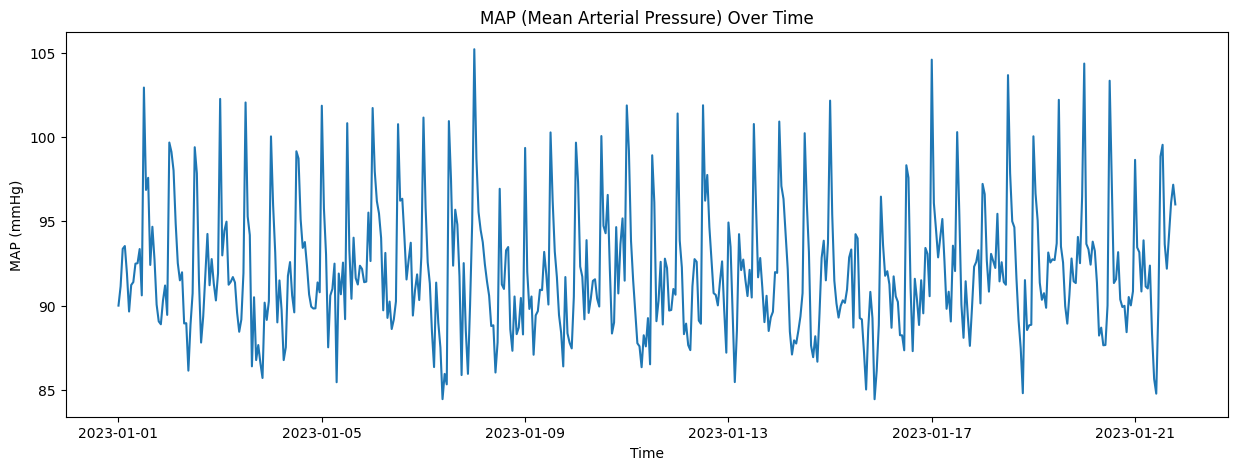

In [ ]:
# MAP over time plot
plt.figure(figsize=(15,5))
plt.plot(df.index, df['MAP_mmHg'])
plt.title("MAP (Mean Arterial Pressure) Over Time")
plt.xlabel("Time")
plt.ylabel("MAP (mmHg)")
plt.show()

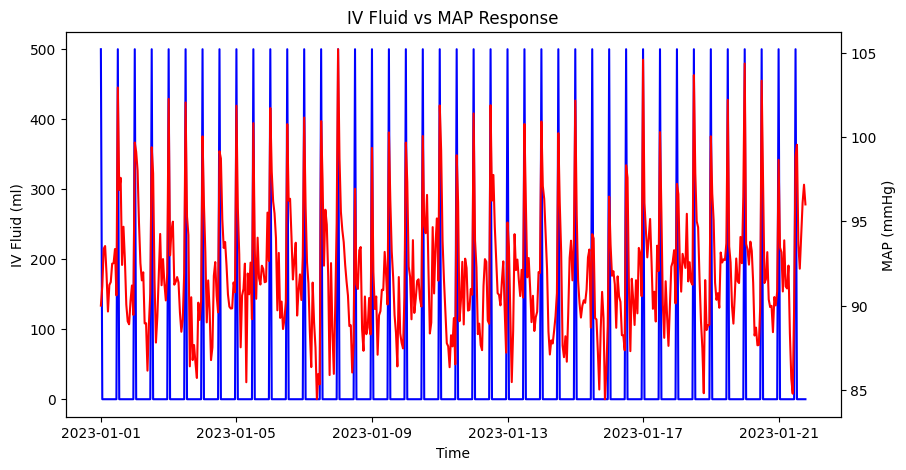

In [30]:
fig, ax1 = plt.subplots(figsize=(10,5))

# First Y-axis (IV Fluid)
ax1.plot(df.index, df['IV_Fluid_ml'], color='blue')
ax1.set_ylabel("IV Fluid (ml)")
ax1.set_xlabel("Time")

# Second Y-axis (MAP)
ax2 = ax1.twinx()
ax2.plot(df.index, df['MAP_mmHg'], color='red')
ax2.set_ylabel("MAP (mmHg)")

plt.title("IV Fluid vs MAP Response")
plt.show()